In [157]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
data = pd.read_csv("D:/Titanic/titanic/train.csv")

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Survived : 0 = 사망, 1 = 생존
# Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
# Sex : male = 남성, female = 여성
# Age : 나이
# SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
# Parch : 타이타닉 호에 동승한 부모 / 자식의 수
# Ticket : 티켓 번호
# Fare : 승객 요금
# Cabin : 방 호수
# Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [43]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

          Survived
Death          549
Survival       342


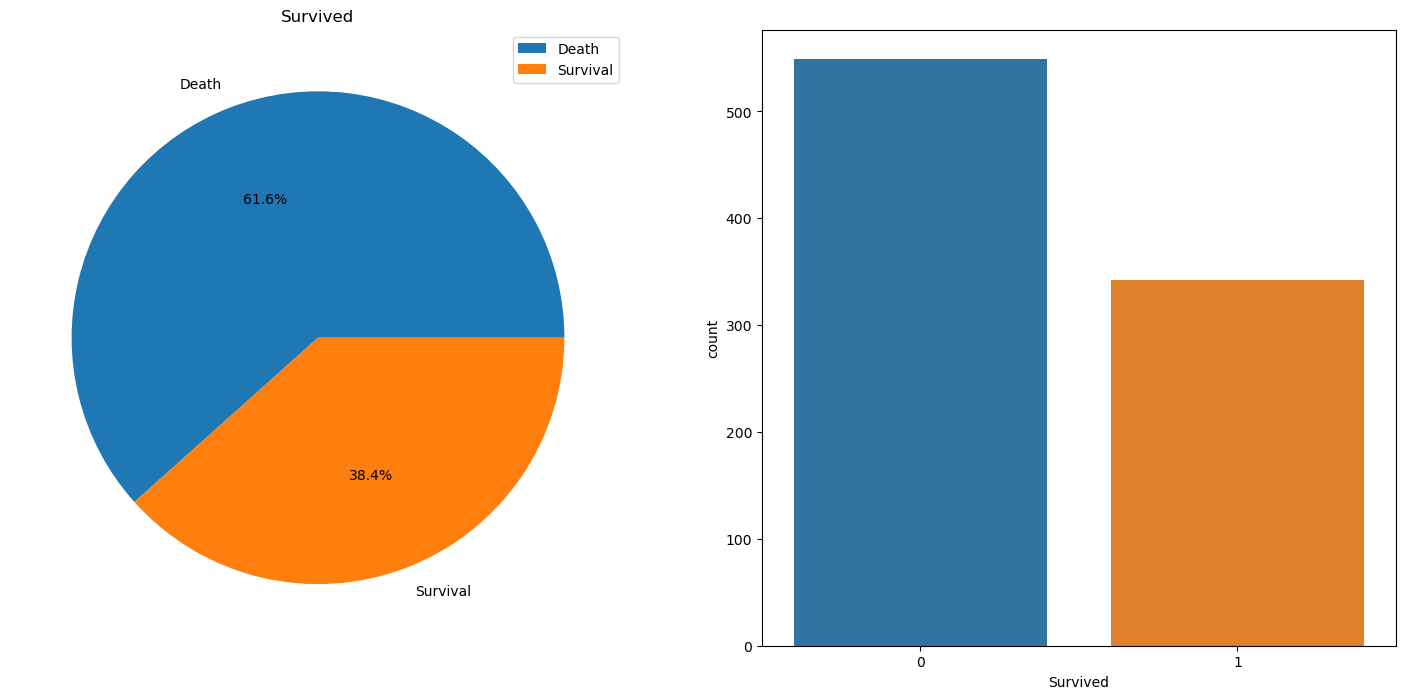

In [239]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df=pd.DataFrame(data['Survived'].value_counts())
df=df.rename(index={0:"Death",1:"Survival"})
print(df)

df.plot.pie(y="Survived",autopct='%1.1f%%',ax=ax[0])
ax[0].set_title("Survived")
ax[0].set_ylabel("")

sns.countplot('Survived', data = data, ax=ax[1])
# ax[1].set_title("Survived")
plt.show()

In [182]:
data.groupby(["Sex","Survived"])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [183]:
data1=data.drop("PassengerId", axis=1)
data1.groupby(["Sex","Survived"]).mean()

Pclass        Age     SibSp     Parch       Fare
Sex    Survived                                                    
female 0         2.851852  25.046875  1.209877  1.037037  23.024385
       1         1.918455  28.847716  0.515021  0.515021  51.938573
male   0         2.476496  31.618056  0.440171  0.207265  21.960993
       1         2.018349  27.276022  0.385321  0.357798  40.821484

<AxesSubplot:xlabel='Sex', ylabel='count'>

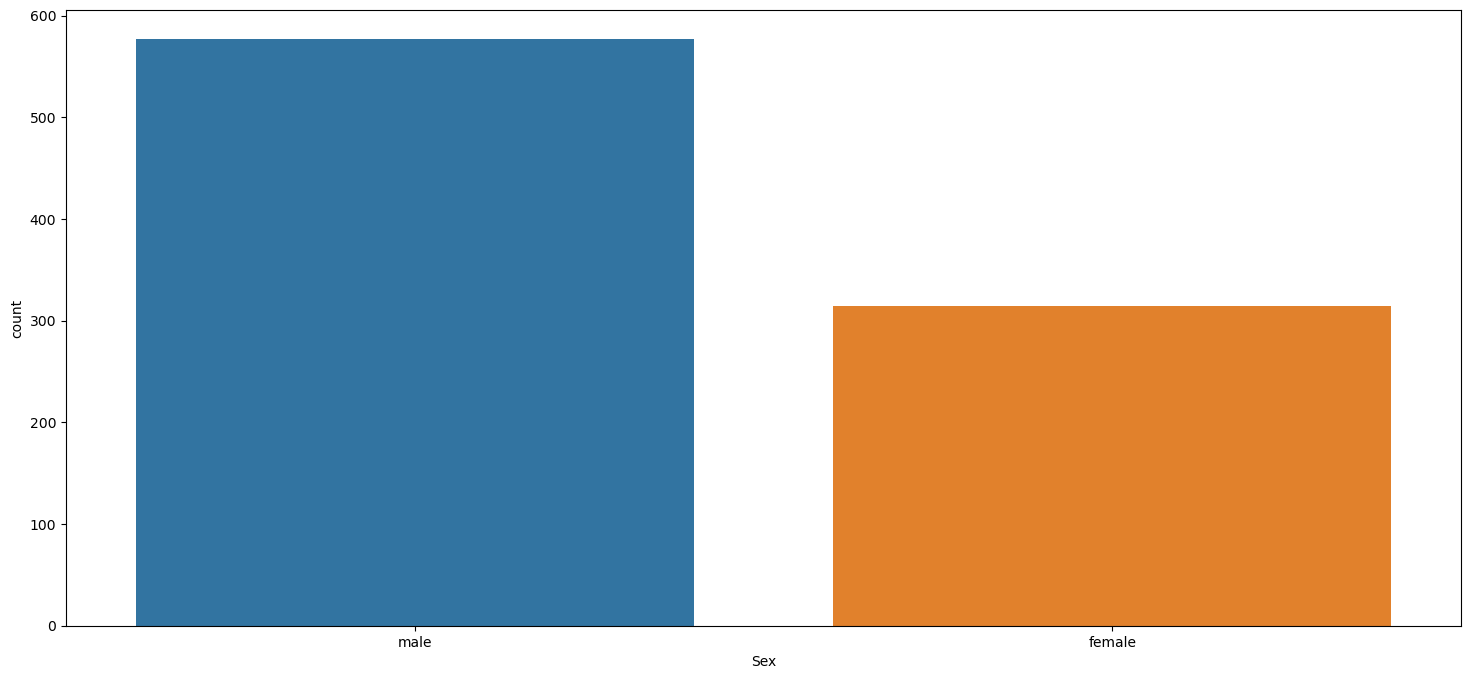

In [246]:
f,ax =plt.subplots(1,1,figsize=(18,8))
sns.countplot('Sex',data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

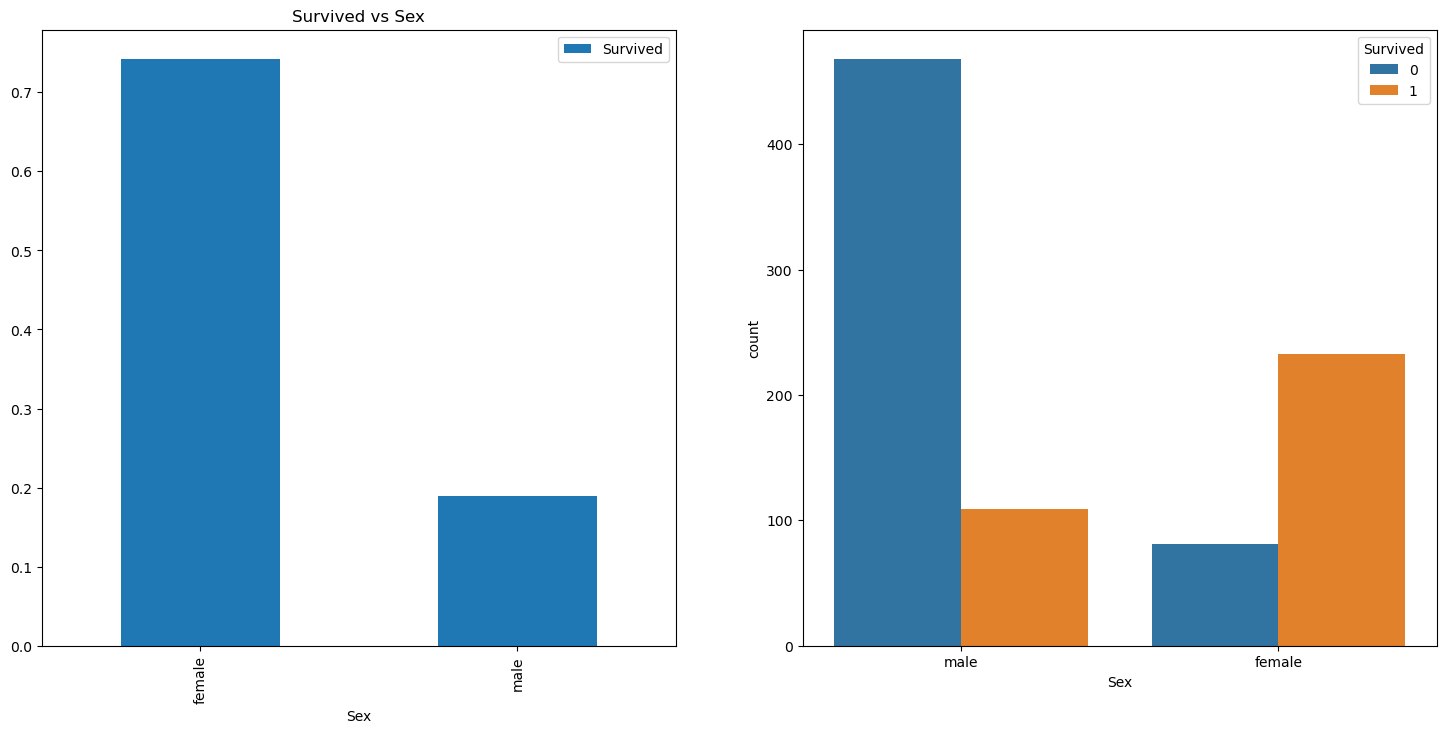

In [242]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue = "Survived", data=data, ax=ax[1])

In [251]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap="PuBu")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


3    491
1    216
2    184
Name: Pclass, dtype: int64


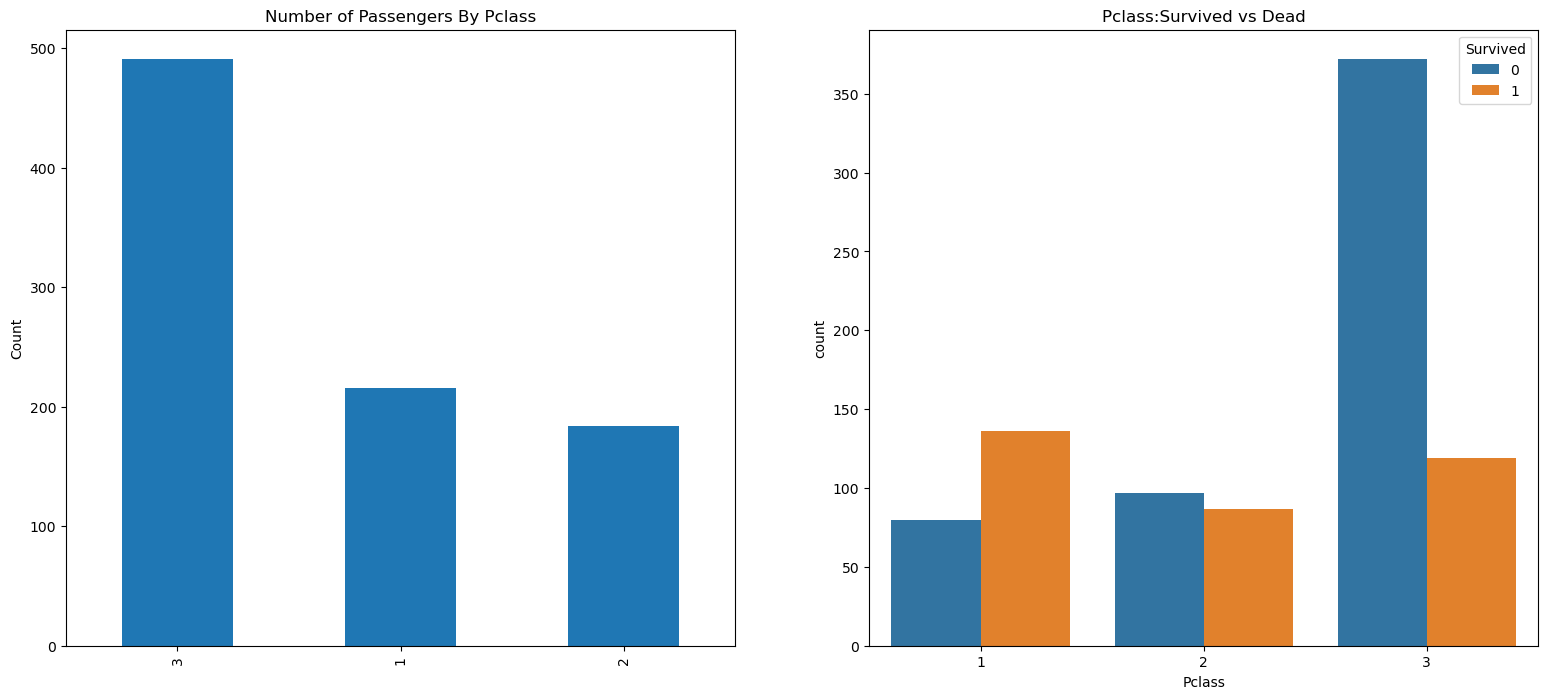

In [264]:
f,ax=plt.subplots(1,2,figsize=(19,8))
print(data['Pclass'].value_counts())

data['Pclass'].value_counts(sort=True).plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass")
ax[0].set_ylabel("Count")


sns.countplot("Pclass", hue="Survived", data =data, ax=ax[1])
ax[1].set_title("Pclass:Survived vs Dead")
plt.show()

In [302]:
def highlight_max(data, color='yellow'): #코드 뜯어보기
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    
    
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [301]:
s = pd.crosstab([data.Sex,data.Survived], data.Pclass,margins=True)
s = s.style.highlight_max().format(None,na_rep="-")
s

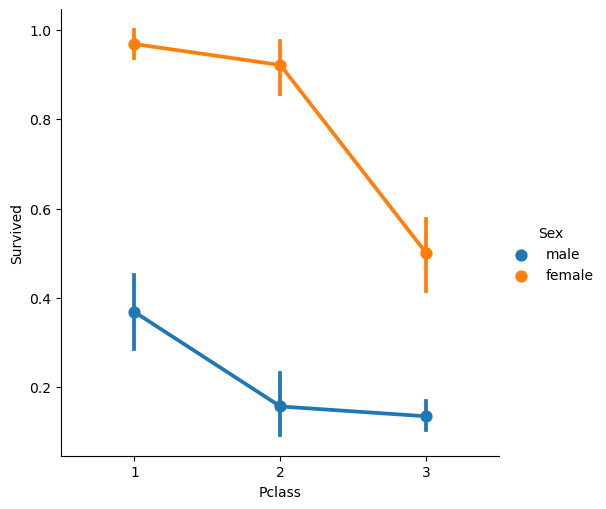

In [306]:
sns.factorplot('Pclass',"Survived", hue="Sex", data=data)
plt.show()

In [311]:
print("Oldest Passenger was of :",data['Age'].max(), "Years")
print("Youngest Passenger was of :",data['Age'].min(), "Years")
print("Average Passenger was of :",data['Age'].mean(), "Years")

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Passenger was of : 29.69911764705882 Years


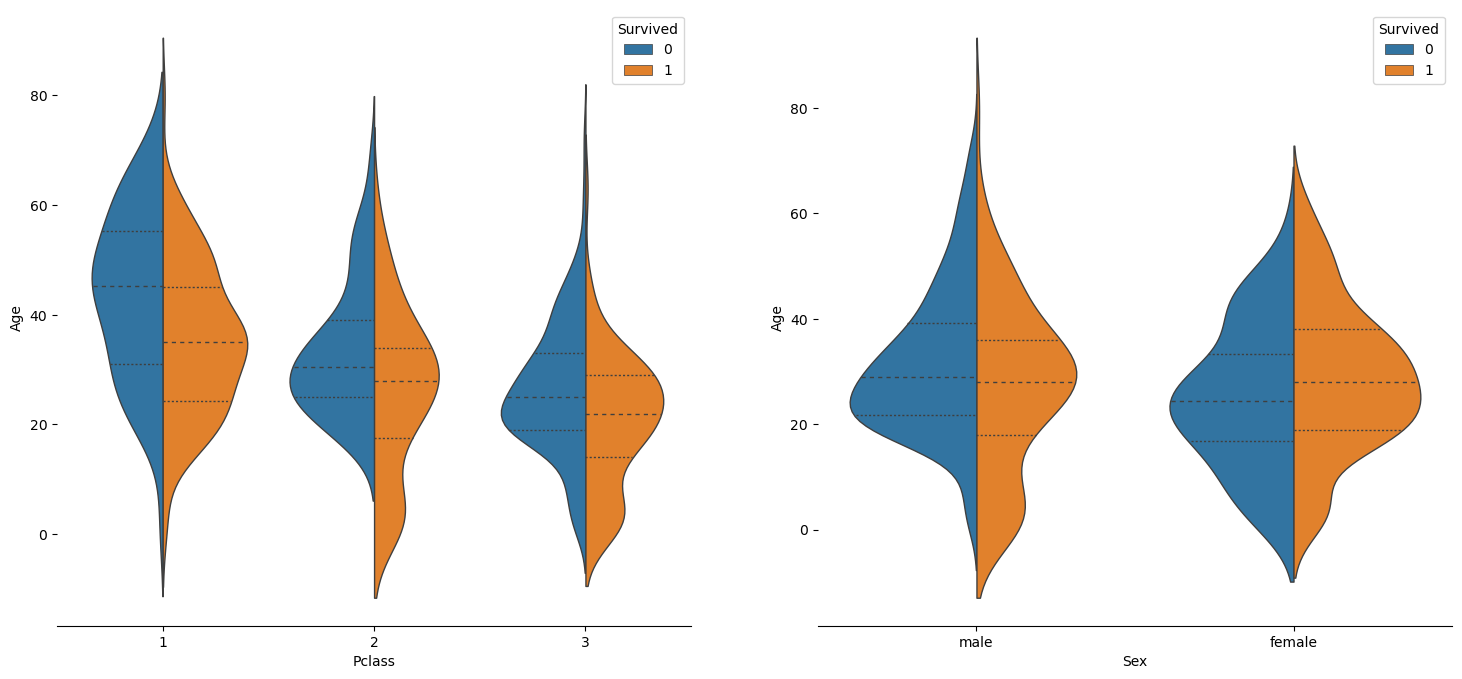

In [349]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=data, x="Pclass", y="Age", hue="Survived",split=True, inner="quart", linewidth=1,ax=ax[0])
sns.despine(left=True)
sns.violinplot(data=data, x="Sex", y="Age", hue="Survived",split=True, inner="quart", linewidth=1,ax=ax[1])
sns.despine(left=True)